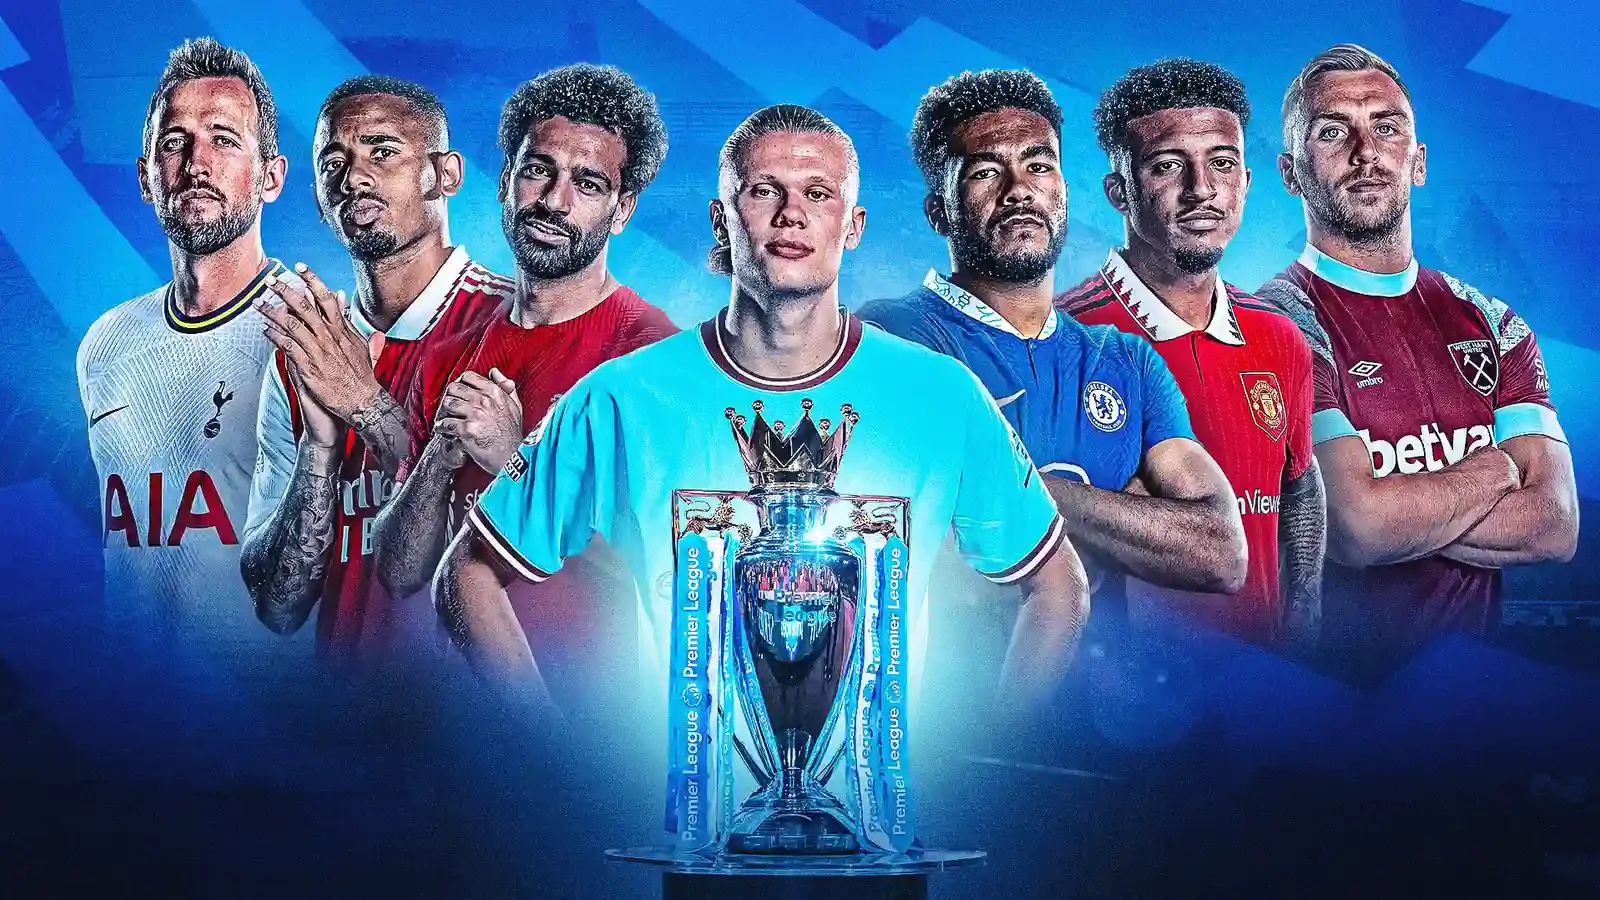

In [3]:
#from IPython.display import Image
#Image("/workspaces/G07_data-analytics/images/pl-banner.jpeg", width='800')

# Market Value Football Players
Group-Nr. 7

Rrezart Dragusha<br>
drarre01@students.zhaw.ch <br>
BA.WIN.22HS.VZb

Leandros Giagiozis<br>
giagilea@students.zhaw.ch <br>
BA.WIN.22HS.VZb

Trim Zejnullahu<br>
zejnutri@students.zhaw.ch <br>
BA.WIN.22HS.VZa

# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import scipy.stats

# Creating Dataframes

Player Dataframe

In [5]:
df_players = pd.read_csv('players.csv')
df_players.head()

,id,name,age,position,club,nationality
0,3333,James Milner,37,Zentrales Mittelfeld,Brighton & Hove Albion,England
1,14044,Andy Lonergan,40,Torwart,FC Everton,England
2,14086,Ashley Young,38,Linker Verteidiger,FC Everton,England
3,14555,Scott Carson,38,Torwart,Manchester City,England
4,16306,Casemiro,31,Defensives Mittelfeld,Manchester United,Brasilien


Marketvalue Development Dataframe

In [6]:
df_marketvaluedevelopment = pd.read_csv('marketvaluedevelopments.csv')
df_marketvaluedevelopment.head()

,playerID,unformattedDate,age,marketValueUnformatted,clubID,clubName,year
0,230784,2023-06-20,30,35000000,11,FC Arsenal,2023
1,230784,2022-11-03,29,38000000,11,FC Arsenal,2022
2,230784,2022-06-15,29,38000000,11,FC Arsenal,2022
3,230784,2021-12-23,28,40000000,11,FC Arsenal,2021
4,230784,2021-06-08,27,40000000,11,FC Arsenal,2021


Perfromance Summaries Dataframe

In [7]:
df_perfromancesummaries = pd.read_csv('performancesummaries.csv')
df_perfromancesummaries.head()

,playerID,ownGoals,yellowCards,yellowRedCards,redCards,minutesPlayed,penaltyGoals,minutesPerGoal,matches,goals,assists,toNil,concededGoals,isGoalkeeper,clubID,clubName,competition_name,year
0,230784,0,0,0,0,251,0,0.000,4,0,0,0,0,NaN,11,FC Arsenal,Premier League,2023
1,230784,0,2,0,0,109,0,0.000,2,0,0,0,0,NaN,3441,Ghana,Freundschaftsspiele,2023
2,230784,0,1,0,0,90,0,0.000,1,0,0,0,0,NaN,11,FC Arsenal,Community Shield,2023
3,230784,0,0,0,0,0,0,0.000,0,0,0,0,0,NaN,11,FC Arsenal,UEFA Champions League,2023
4,230784,0,5,0,0,2485,0,828.333,33,3,0,0,0,NaN,11,FC Arsenal,Premier League,2022


In the following section i did:
- Aggregated the dataframes to get the mean yearly marketvalue and the sum of the yearly perfromances for each player.
- Merged the dataframes to one dataframe (on player id and the respective year)
- Cleanded the data (changed type of values, removed missing values, removed unwanted or redundant columns)
- Created seperate dataframes (with information of all players) for each year

In [8]:
# Aggregates market value developments by player and year to get the yearly mean marketvalue of each player per year
df_market_value_agg = df_marketvaluedevelopment.groupby(['playerID', 'year']).agg({'marketValueUnformatted': 'mean'}).reset_index()
# Aggregates performance summaries by player and year to get the sum of perfromances (goals etc.) per player per year
performance_cols_to_sum = ['ownGoals', 'yellowCards', 'yellowRedCards', 'redCards', 
                           'minutesPlayed', 'penaltyGoals', 'matches', 'goals', 'assists', 
                           'toNil', 'concededGoals']
df_performance_agg = df_perfromancesummaries.groupby(['playerID', 'year'])[performance_cols_to_sum].sum().reset_index()

# Merges players with aggregated market value developments
df_merged = pd.merge(df_players, df_market_value_agg, left_on='id', right_on='playerID')
# Merges the dataframe above with aggregated performance summaries
df_final_merged = pd.merge(df_merged, df_performance_agg, on=['playerID', 'year'], how='outer')


# Removes market values = 0 from the dataframe since they are faulty.
df_final_merged = df_final_merged[df_final_merged['marketValueUnformatted'] > 0]
# Convets the marketvalues to an int for better illsutration when printing the dataframe
df_final_merged['marketValueUnformatted'] = df_final_merged['marketValueUnformatted'].astype(int)
# Drop missing numbers and removing unwanted columns
df_final_merged.dropna(inplace=True)
columns_to_remove = ['age', 'playerID']
df_final_merged.drop(columns_to_remove, axis=1, inplace=True)

df_final_merged

,id,name,position,club,nationality,year,marketValueUnformatted,ownGoals,yellowCards,yellowRedCards,redCards,minutesPlayed,penaltyGoals,matches,goals,assists,toNil,concededGoals
0,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2004,7500000,0.0,1.0,0.0,0.0,2710.0,0.0,52.0,2.0,3.0,0.0,0.0
1,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2005,5750000,0.0,4.0,0.0,0.0,3332.0,0.0,40.0,5.0,3.0,0.0,0.0
2,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2006,4700000,0.0,7.0,0.0,0.0,4871.0,0.0,63.0,4.0,11.0,0.0,0.0
3,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2007,8000000,0.0,3.0,0.0,0.0,3393.0,2.0,43.0,8.0,3.0,0.0,0.0
4,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2008,9375000,0.0,9.0,0.0,0.0,4332.0,2.0,56.0,9.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,983989,Facundo Buonanotte,Offensives Mittelfeld,Brighton & Hove Albion,Argentinien,2023,12000000,0.0,3.0,0.0,0.0,567.0,0.0,14.0,1.0,1.0,0.0,0.0
4384,1005649,Murillo,Innenverteidiger,Nottingham Forest,Brasilien,2023,4333333,0.0,2.0,0.0,0.0,964.0,0.0,11.0,0.0,0.0,0.0,0.0
4385,1060740,Enso González,Linksaußen,Wolverhampton Wanderers,Paraguay,2022,800000,0.0,1.0,0.0,0.0,1776.0,0.0,30.0,3.0,2.0,0.0,0.0
4386,1060740,Enso González,Linksaußen,Wolverhampton Wanderers,Paraguay,2023,2950000,0.0,2.0,0.0,0.0,340.0,0.0,5.0,0.0,0.0,0.0,0.0


Checking for missing values

In [9]:
print(df_final_merged.isnull().sum())

id                        0
name                      0
position                  0
club                      0
nationality               0
year                      0
marketValueUnformatted    0
ownGoals                  0
yellowCards               0
yellowRedCards            0
redCards                  0
minutesPlayed             0
penaltyGoals              0
matches                   0
goals                     0
assists                   0
toNil                     0
concededGoals             0
dtype: int64


In [10]:
# Function for creating yearly dataframes
def create_yearly_dataframes(df):
    years = df['year'].unique()
    return {year: df[df['year'] == year] for year in years}

# Function for displaying a few rows of each years dataframes
def display_yearly_dataframes(yearly_dfs, rows_to_display=5):
    for year, df in yearly_dfs.items():
        print(f"Data for Year {year}:")
        print("--------------------------------------------------")
        display(df.head(rows_to_display))  # Displaying the first few rows
        print("\n")  # Adding a newline for better separation between years
        
# Calling the create yearly dataframes function and saving the return value
yearly_dataframes = create_yearly_dataframes(df_final_merged)

# Calling the display yearly dataframes to print them
# display_yearly_dataframes(yearly_dataframes)

# EDA

## Univariate Non-Graphical EDA

### Summary statistics of entire Dataset

In the following we calculate summary statistics of numerical values of the entire dataset.

In [11]:
# Sets pandas display options to format float numbers (4 numbers after ,)
pd.set_option('display.float_format', '{:.4f}'.format)

# Selects which columns to describe
selected_columns = ['marketValueUnformatted', 'ownGoals', 'yellowCards', 'yellowRedCards', 'redCards', 'minutesPlayed', 'penaltyGoals', 'matches', 'goals', 'toNil', 'concededGoals']
selected_columns_describe = df_final_merged[selected_columns].describe()

print(selected_columns_describe)

       marketValueUnformatted  ownGoals  yellowCards  yellowRedCards  \
count               4349.0000 4349.0000    4349.0000       4349.0000   
mean            11980516.2106    0.0945       3.8565          0.0743   
std             17366052.4838    0.3246       3.3297          0.2776   
min                25000.0000    0.0000       0.0000          0.0000   
25%              1000000.0000    0.0000       1.0000          0.0000   
50%              5166666.0000    0.0000       3.0000          0.0000   
75%             16000000.0000    0.0000       6.0000          0.0000   
max            180000000.0000    4.0000      21.0000          3.0000   

       redCards  minutesPlayed  penaltyGoals   matches     goals     toNil  \
count 4349.0000      4349.0000     4349.0000 4349.0000 4349.0000 4349.0000   
mean     0.0911      2410.6730        0.2630   32.4017    3.6229    1.2483   
std      0.3100      1310.0720        0.9624   15.3122    5.4949    4.0536   
min      0.0000         0.0000        0

#### Interpretation

- The high standard deviation in Market Values indicates large variability between players. There seem to be players with exceedingly high market values as well as players with very low market values. We had to remove marketvalues that were = 0, since they were faulty (4 rows removed).
- The average numbers of goals is about 3.62 (over all years and players). The max number of goals scored is 64. This suggests that goal-scoring is heavily skewed. There seem to be a few players scoring a lot of goals while most palyers score few.
- The average numbers for yellow and red cards seem to be relatively low, but max out at 21 and 3 respectively. This indicates some players having a more aggressive play style.
- Own goals are relatively low, as expected.
- The average play time aswell as matches played varries quite a bit. Reasons for this could be player positions, injuries, substutations or team strategies.

### Skewness of entire Dataset

In the following we calculate the skewness of numerical values of the entire Dataset

In [12]:
selected_columns_skew = df_final_merged[selected_columns].skew()

print(selected_columns_skew)

marketValueUnformatted    2.9714
ownGoals                  3.8037
yellowCards               1.0960
yellowRedCards            3.8793
redCards                  3.4941
minutesPlayed             0.0983
penaltyGoals              5.6949
matches                  -0.1516
goals                     2.8297
toNil                     4.0092
concededGoals             3.1857
dtype: float64


#### Interpretation

Most values are positively skewed, which is fairly common in sports data, where most players have lower statistics and few players have very high statistics. Below is a more detailed analysis of the results.

- Marketvalue: A high positive skewness indicates that most players have a lower market value, while few player have a very high marketvalue.
- Own goals, yellow-red cards, and red cards: A high positive skew, which indicates, that these events rarely occur. Most players have a very low value (or zero), while some players have high numbers.
- Yellow cards: Are moderatly positive skewed. Most players have a lower number of yellow cards but there are still some players with higher numbers of yellow cards.
- Minutes played, matches played: These values are fairly close to 0, indicating a mostly balanced distribution of playing time among the players.
- Penalty goals: High positive skewness, which indicates that only few players score a lot of penalty goals. This makes sense since teams most probably have few players which take most of the penalty shots.
- Goals: Positively skewed, indicating few players scoring many goals.
- To nil, conceded goals: High positive skewness. This indicates that these events are not very common, but a few players have high values

### Kurtosis of entire Dataset

In the following we calculate the skewness of numerical values of the entire Dataset

In [13]:
selected_columns_kurtosis = df_final_merged[selected_columns].kurtosis()

print(selected_columns_kurtosis)

marketValueUnformatted   12.8064
ownGoals                 17.2913
yellowCards               1.2086
yellowRedCards           16.1105
redCards                 12.3545
minutesPlayed            -0.7505
penaltyGoals             44.1844
matches                  -0.6582
goals                    12.2938
toNil                    17.9450
concededGoals             9.5631
dtype: float64


#### Interpretation

The results of calculating the kurtosis reinforce the findings of the skewness calculations. High positive kurtosis values, such as those observed for marketvalues, own goals, yellow-red cards, etc. indicate that these variables exhibit heavy-tailed distributions with a greater concentration of extreme values on the right side. This aligns with the right-skewed nature identified by skewness analysis, highlighting the presence of outliers or data points with high values in these variables.

## Univariate Graphical EDA

### Histograms

#### Marketvalues of the entire Dataset

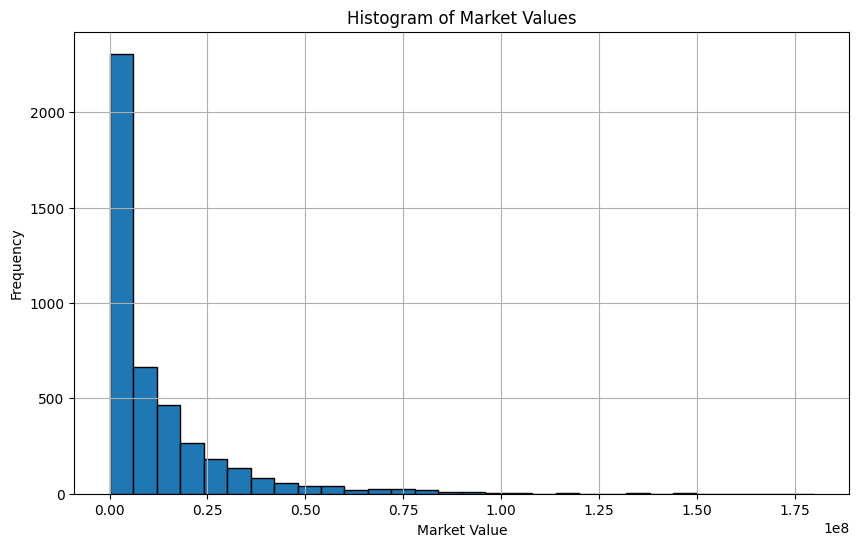

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_final_merged['marketValueUnformatted'], bins=30, edgecolor='black')
plt.title('Histogram of Market Values')
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram shows the market value to be right-skewed. This indicates there are fewer players with high market values and more players with lower market values.

#### Minutes played of the entire Dataset

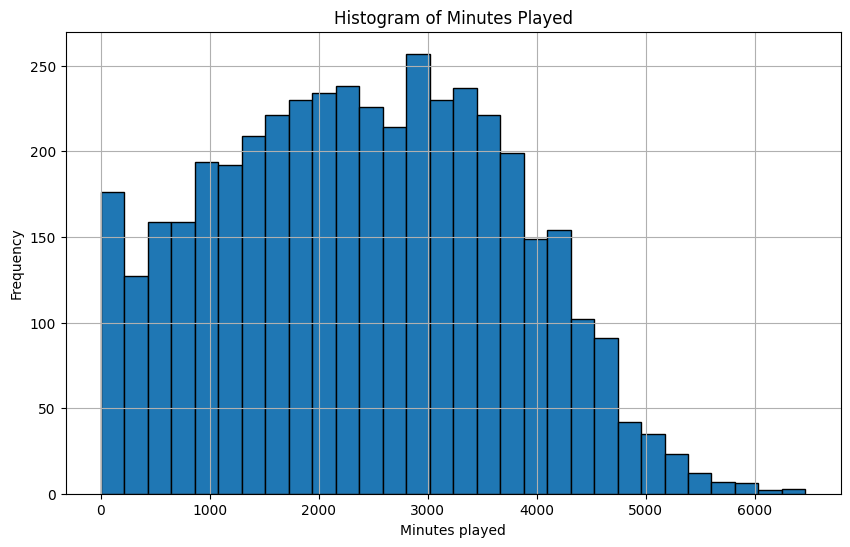

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_final_merged['minutesPlayed'], bins=30, edgecolor='black')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes played')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As seen in the analysis of the skewness in the previous section, the distribution of minutes played seems to be roughly symmetric, with a light right-skew. There is a wide spead in the data, as the minutes played range from 0 to 6000 indicating a variety of playing times among player, from those who play very little to those who play who play a lot.

#### Goals and assists of the entire Dataset

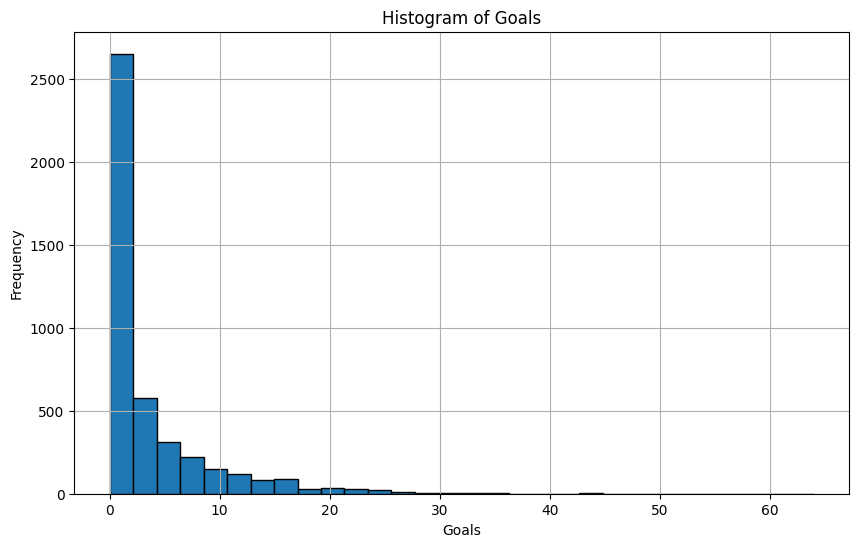

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_final_merged['goals'], bins=30, edgecolor='black')
plt.title('Histogram of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Similarly to market values, the distribution of goals is right-skewed, suggesting most players to score fewer goals with a few players scoring a very high number of goals.

### Boxplots

#### Boxplot of Market Values of the entire Dataset

Text(0.5, 0, 'Market Value')

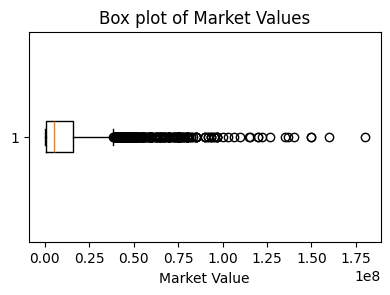

In [17]:
plt.figure(figsize=(10, 6))
# 2 rows, 2 columns, 1st subplot
plt.subplot(2, 2, 1)
plt.boxplot(df_final_merged['marketValueUnformatted'], vert=False)
plt.title('Box plot of Market Values')
plt.xlabel('Market Value')

#### Boxplot of Minutes Played of the entire Dataset

Text(0.5, 0, 'Minutes Played')

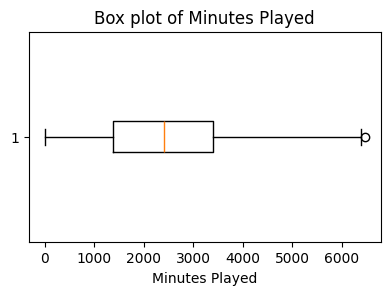

In [18]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.boxplot(df_final_merged['minutesPlayed'], vert=False)
plt.title('Box plot of Minutes Played')
plt.xlabel('Minutes Played')

#### Boxplot of Goals of the entire Dataset

Text(0.5, 0, 'Goals')

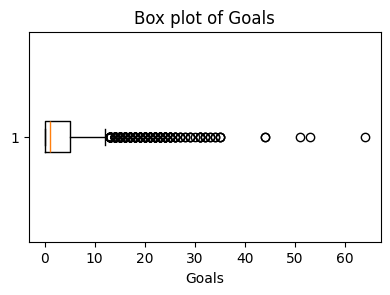

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.boxplot(df_final_merged['goals'], vert=False)
plt.title('Box plot of Goals')
plt.xlabel('Goals')

##### Interpretation

Again we see the heavy right-skewedness, we observed in previous analysis, indicated by the long tail of outliers on the right side aswell as the median lying closer to the 1. Quartile for both market values and goals. The minutes played variable also reinforces previous findings by being more balanced with the whiskers being relatively equal in length.

### Pie Charts

#### Pie Chart for player Nationality of the entire Dataset

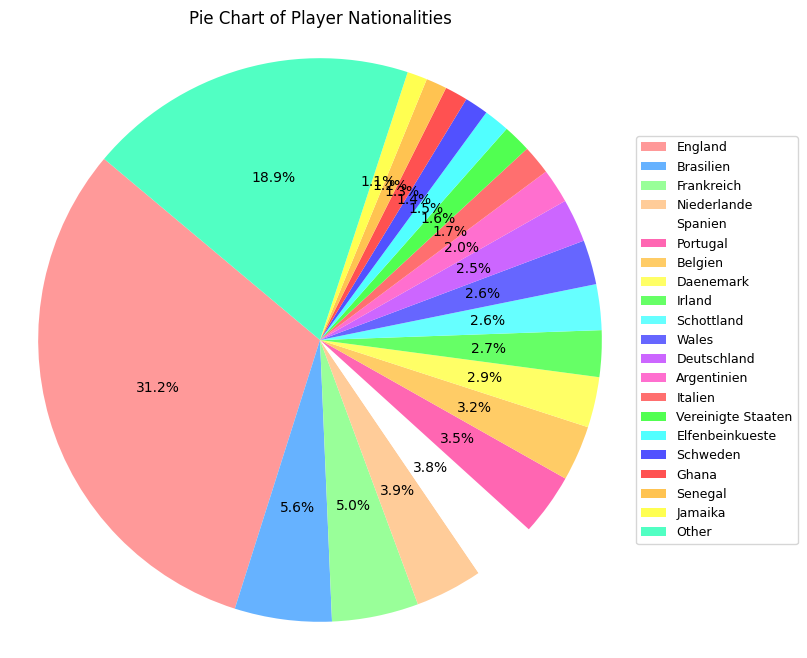

In [20]:
# Count the occurrences of each nationality
nationality_counts = df_final_merged['nationality'].value_counts()

# Sets a threshold to improve the readability of the chart
threshold = 0.01
small_categories = nationality_counts[nationality_counts / nationality_counts.sum() < threshold]
big_categories = nationality_counts[nationality_counts / nationality_counts.sum() >= threshold]
nationality_counts = big_categories
nationality_counts['Other'] = small_categories.sum()

# Defines custom colors, to ensure that they are not repeated
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFFFFF', 
          '#FF66B2', '#FFCC66', '#FFFF66', '#66FF66', '#66FFFF', 
          '#6666FF', '#CC66FF', '#FF6FCF', '#FF6F6F', '#51FF51', 
          '#51FFFF', '#5151FF', '#FF5151', '#FFC351', '#FFFF51', 
          '#51FFC3', '#51C3FF', '#C351FF', '#FF51C3', '#C3FF51', 
          '#000000']


# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart of Player Nationalities')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(nationality_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})  # Adjust text size as needed

# Show the plot
plt.show()


The Pie Chart shows, that most players of the dataset are English in nationality by a large margin. Second and third most represented nationality as Brasil and Other respectively. The "other" section of the chart holds nationalities with a player count of 1% or less. 

### Line Charts

#### Line chart for Mean Market Value of all Players per year

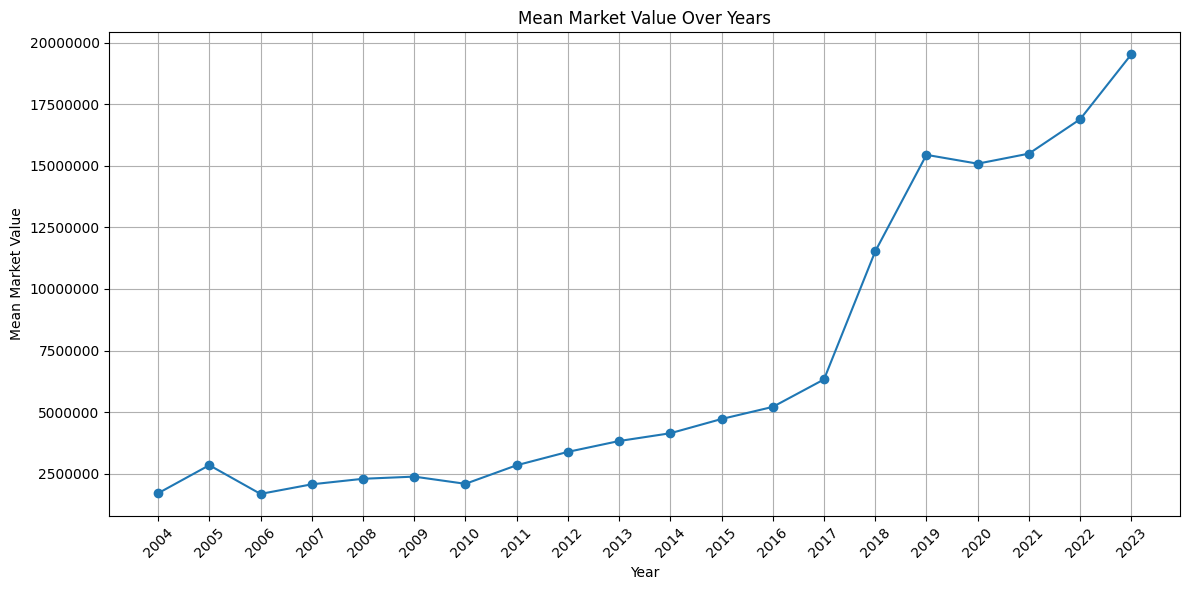

In [21]:
# Calculate the mean market value for each year
mean_market_values_by_year = df_final_merged.groupby('year')['marketValueUnformatted'].mean()

# Sort the years, if they aren't in order already
mean_market_values_by_year = mean_market_values_by_year.sort_index()

# Plot the mean market value for each year as a line chart
plt.figure(figsize=(12, 6))  # Set the figure size as desired
plt.plot(mean_market_values_by_year.index, mean_market_values_by_year.values, marker='o')

# Set y-axis to plain style to avoid scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set x-axis ticks to be every year in the dataset
plt.xticks(mean_market_values_by_year.index)

plt.title('Mean Market Value Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Market Value')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.tight_layout()  # Adjust the layout

# Show the plot
plt.show()

The Line Chart above clearly visualises a general upward trend in the mean market value of players of the years.This could indicate a number of things like inflation in the market, increased investments in the sport, increased popularity of the sport, or better perfromance of players.Sharp jumps like in 2017 could correspond to particular events like competitions, or regulartory changes in the sport.

This can be valueable information suggesting that market values are not neccessarily corresponding to players perfromances, but also to the general popularity of the sport.

## Multivariate Graphical EDA

### Scatterplot Matrix

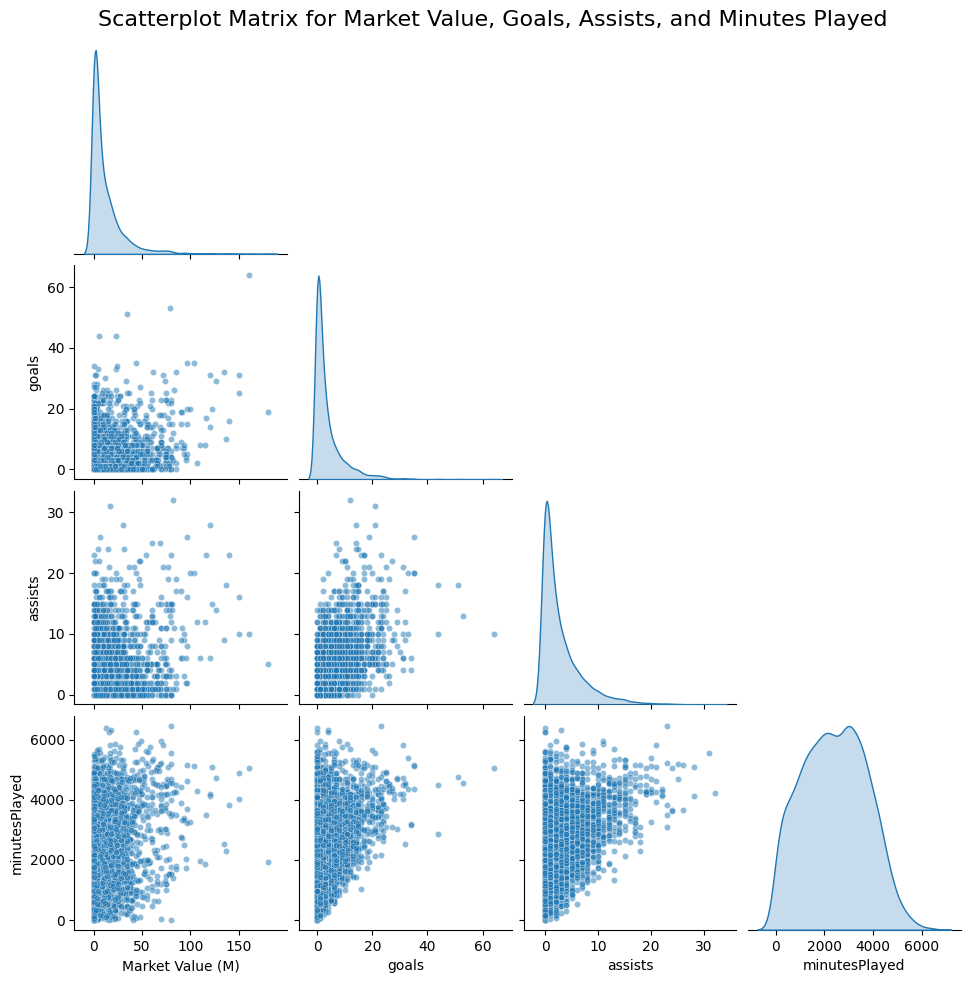

In [22]:
# Changes format of market values to millions for better readability (no scientific values)
df_final_merged['marketValueInMillions'] = df_final_merged['marketValueUnformatted'] / 1e6

# Creates a pairGrid object
g = sns.pairplot(df_final_merged[['marketValueInMillions', 'goals', 'assists', 'minutesPlayed']], 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 corner=True)

g.fig.set_size_inches(10, 10)

# Changes notation of x and y labels
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel().replace('marketValueInMillions', 'Market Value (M)'))
        ax.set_ylabel(ax.get_ylabel().replace('marketValueInMillions', 'Market Value (M)'))

g.fig.suptitle('Scatterplot Matrix for Market Value, Goals, Assists, and Minutes Played', size=16)
plt.subplots_adjust(top=0.95)
plt.show()

This gives us a good overfew of the correlation of Market Values, Goals, Assists, and Minutes Played. We can see that high market values are rare and seem to be associated with players who score more goals. However this relationship is not linear and there are players with high market values that do not score as many goals, suggesting other factors are at play. However there is a general trend that players who do score goals and assists tend to have a higher market value.
Minutes played does not have a clear linear relationship to marketvalues. There are a lot of players with high playtimes and relatively low marketvalues, while some palyers have relatively low playtimes and high market values. We will analyse a few of these further, focused on Market Values, in the next section "Scatterplots".

### Scatterplots and Pearsons correlaton coefficient

#### Market Vlaues vs. Goals

- Null-Hypothesis (H0): There is no linear correlation between the players market value and the amount of goals they score.
- Significance level (alpha): 0.05.

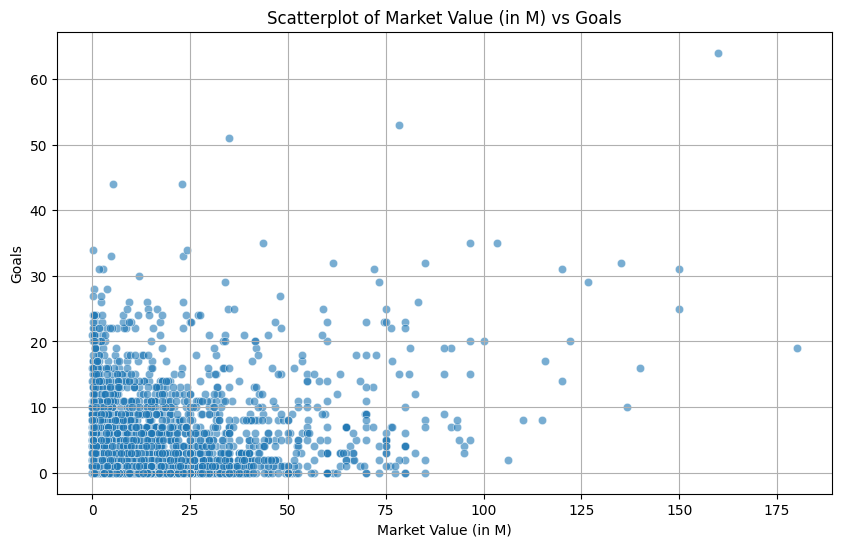

In [23]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final_merged, x='marketValueInMillions', y='goals', alpha=0.6)
plt.title('Scatterplot of Market Value (in M) vs Goals')
plt.xlabel('Market Value (in M)')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

In [24]:
# Performs Pearsons correlation
res = scipy.stats.pearsonr(df_final_merged['marketValueInMillions'], df_final_merged['goals'])

print(f'Pearsons correlation coefficiant (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Pearsons correlation coefficiant (r): 0.2933
p-value: 0.0000


Interpretation:

The plot above confirms a concentration of players at the lower end of marekt values and goals. This suggests that most players have fewer market values and score fewer goals. Still there seems to be a slight correlation between the two indicated by players with higher market values scoring more goals, but those players are rare and there seems to be a wide range of market values for players who score few goals.

The pearsons correlation coefficiant (r) confirms this, suggesting that there is a weak-moderate linear relationship between players market values and their goals. It seems there is some degree of linear association, though not a strong one.
The p-value of 0.0000 suggests that the correlation is statistically significant and the null-hypothesis can be rejected. While the relationship is statistically significant, the correlation between the two is not strong. This implies that other factors also play a significant role in influencing the variables.

#### Market Values vs. Assists

- Null-Hypothesis (H0): There is no linear correlation between the players market value and the amount of assists they have.
- Significance level (alpha): 0.05.

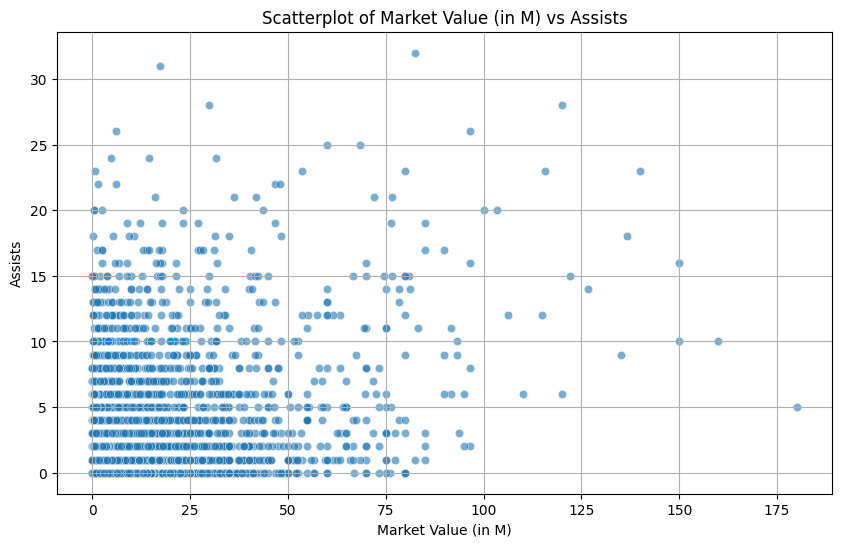

In [25]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final_merged, x='marketValueInMillions', y='assists', alpha=0.6)
plt.title('Scatterplot of Market Value (in M) vs Assists')
plt.xlabel('Market Value (in M)')
plt.ylabel('Assists')
plt.grid(True)
plt.show()

In [26]:
# Performs Pearsons correlation
res = scipy.stats.pearsonr(df_final_merged['marketValueInMillions'], df_final_merged['assists'])

print(f'Pearsons correlation coefficiant (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Pearsons correlation coefficiant (r): 0.2982
p-value: 0.0000


Interpretation:

Similar to goals, there is a concentration at the lower end for both values. There is a slight trend, suggesting players with higher market values having more assists, but the correlation is not strong (as shown by players with high market values having a relatively low number of assists).

The pearsons correlation coefficiant (r) at 0.2982 again, similar to goals, confirms the prescence of a weak-moderate correlation between the values. Though not strong it suggests a linear relationship between the two.
The p-value of 0.0000 is lower than the significance level, so the null-hypothesis can be rejected. Again, like with market values and goals, thought the correlation is statistically significant it is not strong (as seen with the pearsons correlation coefficient). Therefor there are probably other influencing variables at play.

#### Market Values vs. Minutes Played

- Null-Hypothesis (H0): There is no linear correlation between the players market value and the amount of minutes they have played.
- Significance level (alpha): 0.05.

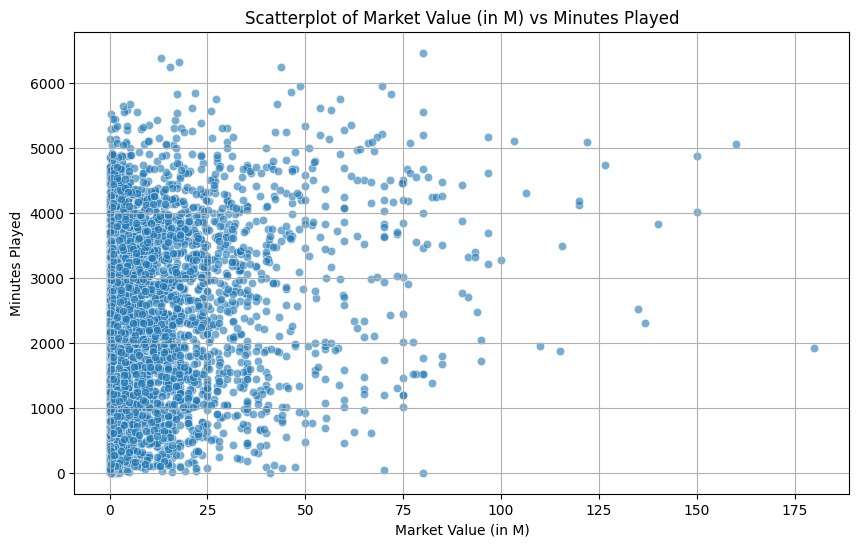

In [27]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final_merged, x='marketValueInMillions', y='minutesPlayed', alpha=0.6)
plt.title('Scatterplot of Market Value (in M) vs Minutes Played')
plt.xlabel('Market Value (in M)')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.show()

In [28]:
# Performs Pearsons correlation
res = scipy.stats.pearsonr(df_final_merged['marketValueInMillions'], df_final_merged['minutesPlayed'])

print(f'Pearsons correlation coefficiant (r): {res[0]:.10f}')
print(f'p-value: {res[1]:.4f}')

Pearsons correlation coefficiant (r): 0.1773534692
p-value: 0.0000


Interpretation:

The scatterplot above shows no clear upwards trend between the two values. This indicates that minutes played is not directly proportional to the market value of players. Most likely market values are influenced by other factors (maybe in addition to playing time).

The pearsons correlation coefficient (r) suggests a weak positive correlation between the players market values and their minutes played. When one value increases the other has the tendency to do so too, but its a weak relation.
The p-value of 0.0000 suggests that the correlation is statistically significant and the null-hypothesis can be rejected. As for goals and assists while the relationship seems to be statistically significant, the correlation is not strong!

#### Market Values vs. Yellow Cards

- Null-Hypothesis (H0): There is no linear correlation between the players market value and the amount of yellow cards they have recieved.
- Significance level (alpha): 0.05.

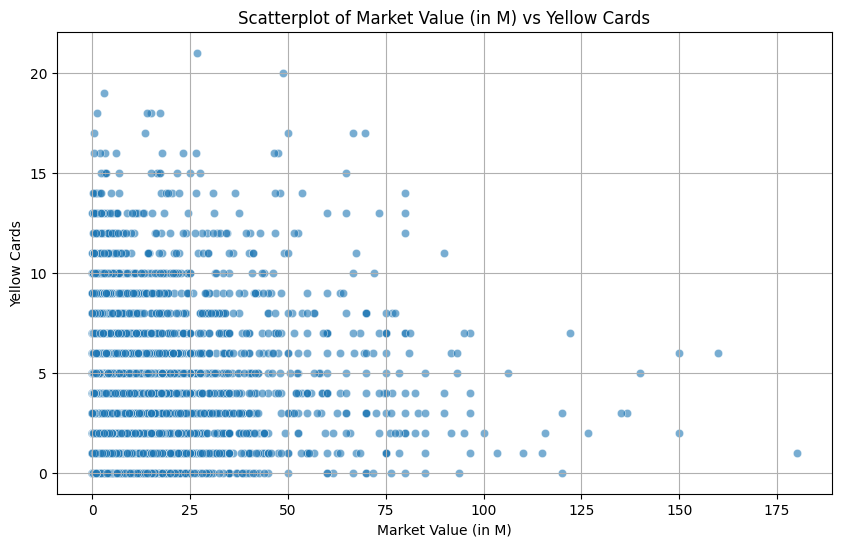

In [29]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final_merged, x='marketValueInMillions', y='yellowCards', alpha=0.6)
plt.title('Scatterplot of Market Value (in M) vs Yellow Cards')
plt.xlabel('Market Value (in M)')
plt.ylabel('Yellow Cards')
plt.grid(True)
plt.show()

In [30]:
# Performs Pearsons correlation
res = scipy.stats.pearsonr(df_final_merged['marketValueInMillions'], df_final_merged['yellowCards'])

print(f'Pearsons correlation coefficiant (r): {res[0]:.10f}')
print(f'p-value: {res[1]:.4f}')

Pearsons correlation coefficiant (r): 0.1119199916
p-value: 0.0000


Interpretation:

The plot shows a wide spread of market values, with most datapoints being located in the lower end of the market value indicating few players having very high market values. There does no appear to be a strong relationship between the two values and most players, regardless of their market values seem to have a relatively low number of yellow cards.

The preasons correlation coefficient (r) of approximately 0.11 suggests a weak positive relationship between the two values. This implies a slight trend for player with high market values to recieve more yellow cards.
The p-value lies at 0.0000 indicating a statistical significance despite the low practical significance.

#### Market Values vs. Yellow-Red Cards

- Null-Hypothesis (H0): There is no linear correlation between the players market value and the amount of yellow-red cards they have recieved.
- Significance level (alpha): 0.05.

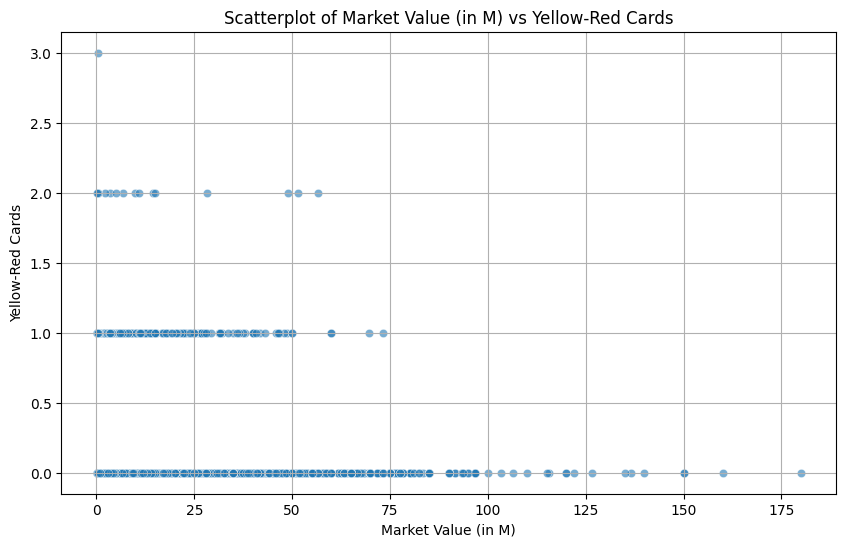

In [31]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final_merged, x='marketValueInMillions', y='yellowRedCards', alpha=0.6)
plt.title('Scatterplot of Market Value (in M) vs Yellow-Red Cards')
plt.xlabel('Market Value (in M)')
plt.ylabel('Yellow-Red Cards')
plt.grid(True)
plt.show()

In [32]:
# Performs Pearsons correlation
res = scipy.stats.pearsonr(df_final_merged['marketValueInMillions'], df_final_merged['yellowRedCards'])

print(f'Pearsons correlation coefficiant (r): {res[0]:.10f}')
print(f'p-value: {res[1]:.4f}')

Pearsons correlation coefficiant (r): -0.0028164654
p-value: 0.8527


Interpretation:

Most players with higher market values have not necessarily recieved more red card, indicated by the lack of upwards movement along the y-axis.

The Pearsons correlation coefficiant (which is very close to 0), indicates no linear relationship between players market values and the amounts of yellow-red cards they've recieved. 
This is reflected in the p-value (0.8527) which indicates that the findings are not statistically significant and the null-hypothesis can not be rejected!

#### Market Values vs. Red Cards

- Null-Hypothesis (H0): There is no linear correlation between the players market value and the amount of red cards they have recieved.
- Significance level (alpha): 0.05.

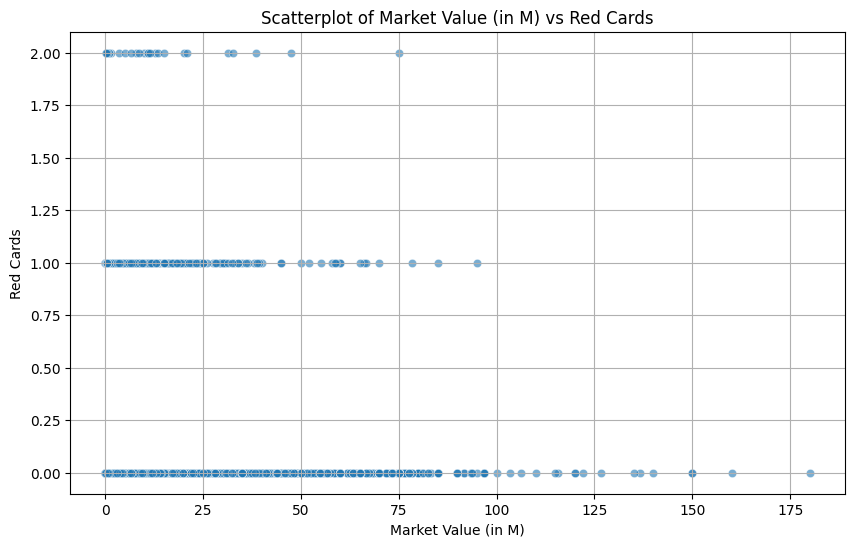

In [33]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final_merged, x='marketValueInMillions', y='redCards', alpha=0.6)
plt.title('Scatterplot of Market Value (in M) vs Red Cards')
plt.xlabel('Market Value (in M)')
plt.ylabel('Red Cards')
plt.grid(True)
plt.show()

In [34]:
# Performs Pearsons correlation
res = scipy.stats.pearsonr(df_final_merged['marketValueInMillions'], df_final_merged['redCards'])

print(f'Pearsons correlation coefficiant (r): {res[0]:.10f}')
print(f'p-value: {res[1]:.4f}')

Pearsons correlation coefficiant (r): -0.0183240560
p-value: 0.2270


Interpretation:

Similar to the scatterplot of yellow-red cards, most players have not recieved many red cards.

The pearsons correlation coefficiant (r) indicates a negligible negative linear relationship between the values, indicating a very slight decrease of red cards if the market value increases.
The p-value of 0.2270 is above the significance level suggesting no statistical significance. The null-hypothesis therefor can not be rejected.

### Heatmap

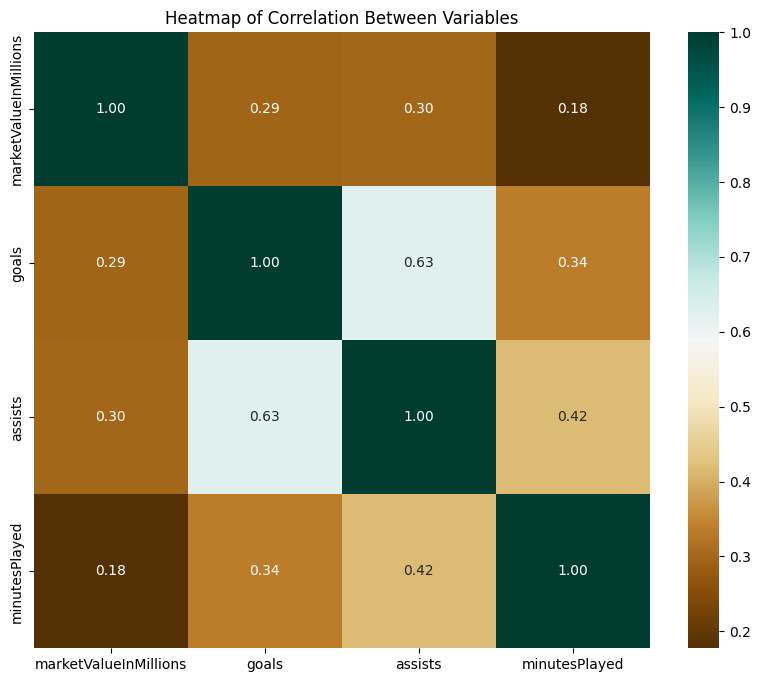

In [35]:
# Assuming 'df_final_merged' is your DataFrame and it contains the required columns
# First, calculate the correlation matrix
corr = df_final_merged[['marketValueInMillions', 'goals', 'assists', 'minutesPlayed']].corr()

# Now, create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BrBG', cbar=True, square=True)
plt.title('Heatmap of Correlation Between Variables')
plt.show()

Interpretation:

- A coefficient close to 1 implies a strong positive correlation, while a coefficient close to -1 implies a strong negative correlation. A coefficient close to 0 implies little to no linear correlation between the variables.
- Comparing Market Values to Goals and Assists there is a moderate positive correlation (0.29 and 0.3 respectively). This, again, suggests players with high amounts of goals and assists having higher market values. The relation isnt strong though!
- Market Values and Minutes Played display a weak positive correlation as determined in the previous Scatterplots.
- Goals and Minutes Played, aswell as Assists and Minutes played (0.34 and 0.42 respectively) show a moderate positive correlation, which makes sense since players who have spent more minutes palying tend to score more goals and assists.
- Goals and Assists have a relatively strong positive correlation, indicating that players who score more goals also tend to have more assists.

# Regression Modeling

## Linear Regression Model for Market Values 

In [36]:
# Defining features and the target variable
X = df_final_merged[['goals', 'assists', 'minutesPlayed', 'penaltyGoals', 'matches', 'yellowCards', 'yellowRedCards', 'redCards', 'concededGoals']]
y = df_final_merged['marketValueInMillions']

# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes and trains the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicts on the test data
y_pred = regressor.predict(X_test)

# Evaluates the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Pairs feature names with their coefficients
feature_coefficients = dict(zip(['goals', 'assists', 'minutesPlayed', 'penaltyGoals', 'matches', 'yellowCards', 'yellowRedCards', 'redCards', 'concededGoals'], regressor.coef_))

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('------------------------')
print('Features - Coefficients')
print('------------------------')
# For loop to print tha features and the coefficients
for feature, coeff in feature_coefficients.items():
    print(f'{feature}: {coeff}')

Mean Squared Error: 274.39135822478534
R-squared: 0.10714287577850001
------------------------
Features - Coefficients
------------------------
goals: 0.38135177650083046
assists: 0.6012218771875123
minutesPlayed: 0.0005939556847579519
penaltyGoals: 1.4914636675972737
matches: 0.0503843375700717
yellowCards: -0.05161177037979428
yellowRedCards: -1.0102359666411096
redCards: -1.9243047729793583
concededGoals: -0.07730386434433306


Interpretation:

- Goals: For each adittional goal, the marketvalue increases by approximately 0.414 million (holding other factors constant).
- Assists: Each assist increases the marketvalue by approximately 0.660 million.
- Minutes Played: Each minute played very slightly decreases the market value.
- Penalty Goals: Penalty goals have a sgnificantly positive impact, each penalty goal increasing the marketvalue by 1.443 million.
- Matches: Each additional match played increases the market value slightly by approximately 0.078 million.
- Yellow Cards: Each additional yellow card increases the marketvalue by approximately 0.086 million.
- Yellow-Red Cards: Recieving a yellow-red card is associated with a decrease of market value by approximately 0.897 million.
- Red Card: Red cards have a notable negative impact, each red card resulting in a decreased market value of approximately 1.871 million.
- Conceded Goals: Conceded value has very little impact on the change of the market value. With a slight negative coefficient we can say that it's not very relevant.

MSE: The MSE is a Measure of the average of squared differences between the predicted values and the actual values. A lower MSE indicates a better fit of the model to the data. The approximate result 274.3 suggests, that the models predictions are, on average, 274.3 units squared awway from the actual market value (in millions).

R-squared: This is a statistical measure of how close the data are to the fitted regression line. It ranges from 0 to 1, with higer values indicating a better fit. In our case the approximate result 0.107 means that about 10.7% of the variation in the market value is explained by our model. While there is some relationship between the perfromance values of players, a large portion of the variation in players market values is unexplained by the model. This could mean that other factors not included in out dataset have a great influence on players market values or that the relationships are more compleex than what a linear model can capture.

Despite employing various methods such as feature engineering and one-hot encoding (particularly for player positions), we found that these techniques did not significantly improve our models fit. Our analysis suggests that while player performance metrics do influence market values to an extent, the sports complexity, with its countless different influencing factors, makes it challenging to pinpoint performance as the key metric for market value based on our dataset alone. Other factors like media exposure, team performance, and maybe even the population in the players or teams country of origin, which were not included in our dataset, may also play crucial roles in determining market values. This complexity indicates that a more comprehensive dataset might be necessary for a more accurate analysis.

## Random Forest Regression

In [37]:
# Initializes the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Trains the model with the previously split train and test data (see linear regression model)
random_forest_regressor.fit(X_train, y_train)

# Predicts on the test data
y_pred = random_forest_regressor.predict(X_test)

# Evaluates the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Random Forest Regression Mean Squared Error: {mse}')
print(f'Random Forest Regression R-squared: {r2}')

Random Forest Regression Mean Squared Error: 278.55243605160496
Random Forest Regression R-squared: 0.09360291589728365


Interpretation:

The results of the Random Forest Regression are similar to those of the linear Regression. Both the high MSE and the low R-squared suggest that the model may not be fitting the data well. Again this could result in the complexity of the subject fields relationships or because essential predictive features are missing.

### Feature Importance

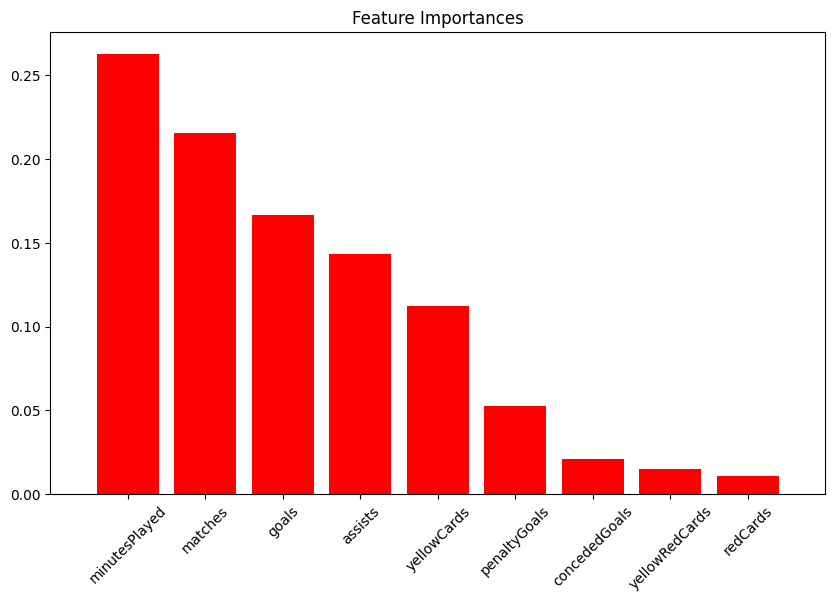

In [38]:
# Extracts feature importances
importances = random_forest_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns


plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

Interpretation:

The Feature importance tells us how much each feature contributes to the accuracy of the model. Minutes Played has the highest feature importance, which suggests its a significant predictor when combined with other features within the decision trees, despite its lower individual linear correlation with players market values. The amount of minutes played can, for example, be attributed to players fitness.

Matches played is the second most important feature. This aligns with minutes played to some extent, indicating players consistency and regular selection for games.

As expected the number of goals a player scores is a strong predictor of their market value. The feature importance reflects that goal scoring is a highly priced ability.


# k-means clustering

### Import Libraries

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

### Show dataset with all information

In [40]:
# show dataset with all information
df_final_merged

,id,name,position,club,nationality,year,marketValueUnformatted,ownGoals,yellowCards,yellowRedCards,redCards,minutesPlayed,penaltyGoals,matches,goals,assists,toNil,concededGoals,marketValueInMillions
0,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2004,7500000,0.0000,1.0000,0.0000,0.0000,2710.0000,0.0000,52.0000,2.0000,3.0000,0.0000,0.0000,7.5000
1,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2005,5750000,0.0000,4.0000,0.0000,0.0000,3332.0000,0.0000,40.0000,5.0000,3.0000,0.0000,0.0000,5.7500
2,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2006,4700000,0.0000,7.0000,0.0000,0.0000,4871.0000,0.0000,63.0000,4.0000,11.0000,0.0000,0.0000,4.7000
3,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2007,8000000,0.0000,3.0000,0.0000,0.0000,3393.0000,2.0000,43.0000,8.0000,3.0000,0.0000,0.0000,8.0000
4,3333,James Milner,Zentrales Mittelfeld,Brighton & Hove Albion,England,2008,9375000,0.0000,9.0000,0.0000,0.0000,4332.0000,2.0000,56.0000,9.0000,11.0000,0.0000,0.0000,9.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,983989,Facundo Buonanotte,Offensives Mittelfeld,Brighton & Hove Albion,Argentinien,2023,12000000,0.0000,3.0000,0.0000,0.0000,567.0000,0.0000,14.0000,1.0000,1.0000,0.0000,0.0000,12.0000
4384,1005649,Murillo,Innenverteidiger,Nottingham Forest,Brasilien,2023,4333333,0.0000,2.0000,0.0000,0.0000,964.0000,0.0000,11.0000,0.0000,0.0000,0.0000,0.0000,4.3333
4385,1060740,Enso González,Linksaußen,Wolverhampton Wanderers,Paraguay,2022,800000,0.0000,1.0000,0.0000,0.0000,1776.0000,0.0000,30.0000,3.0000,2.0000,0.0000,0.0000,0.8000
4386,1060740,Enso González,Linksaußen,Wolverhampton Wanderers,Paraguay,2023,2950000,0.0000,2.0000,0.0000,0.0000,340.0000,0.0000,5.0000,0.0000,0.0000,0.0000,0.0000,2.9500


### Select relevant features for clustering

In [41]:
features = df_final_merged[['marketValueUnformatted', 'ownGoals', 'yellowCards', 'yellowRedCards', 'redCards', 'minutesPlayed', 'penaltyGoals', 'matches', 'goals', 'assists', 'toNil', 'concededGoals']]

### Plot elbow method

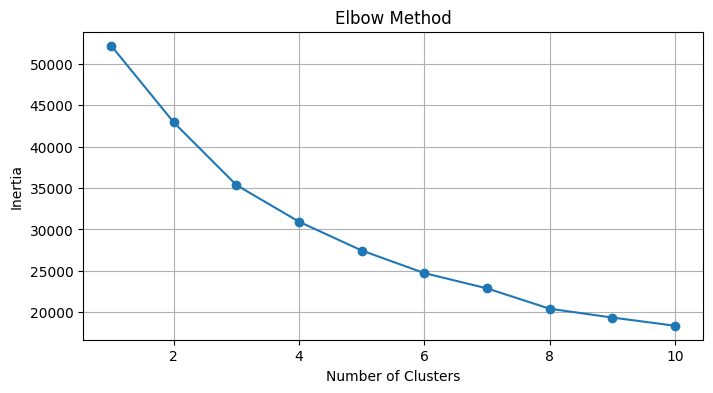

In [42]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=30)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Choose value for k and prepare k-means clustering dataframe

In [43]:
# Choose a number of clusters (k) based on the elbow plot
chosen_k = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=chosen_k, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to your original DataFrame
df_final_merged['cluster'] = cluster_labels

# Output the first few rows of the DataFrame to check
print(df_final_merged.head())

     id          name              position                    club  \
0  3333  James Milner  Zentrales Mittelfeld  Brighton & Hove Albion   
1  3333  James Milner  Zentrales Mittelfeld  Brighton & Hove Albion   
2  3333  James Milner  Zentrales Mittelfeld  Brighton & Hove Albion   
3  3333  James Milner  Zentrales Mittelfeld  Brighton & Hove Albion   
4  3333  James Milner  Zentrales Mittelfeld  Brighton & Hove Albion   

  nationality  year  marketValueUnformatted  ownGoals  yellowCards  \
0     England  2004                 7500000    0.0000       1.0000   
1     England  2005                 5750000    0.0000       4.0000   
2     England  2006                 4700000    0.0000       7.0000   
3     England  2007                 8000000    0.0000       3.0000   
4     England  2008                 9375000    0.0000       9.0000   

   yellowRedCards  redCards  minutesPlayed  penaltyGoals  matches  goals  \
0          0.0000    0.0000      2710.0000        0.0000  52.0000 2.0000   


### Reduce number of features & plot k-means clustering

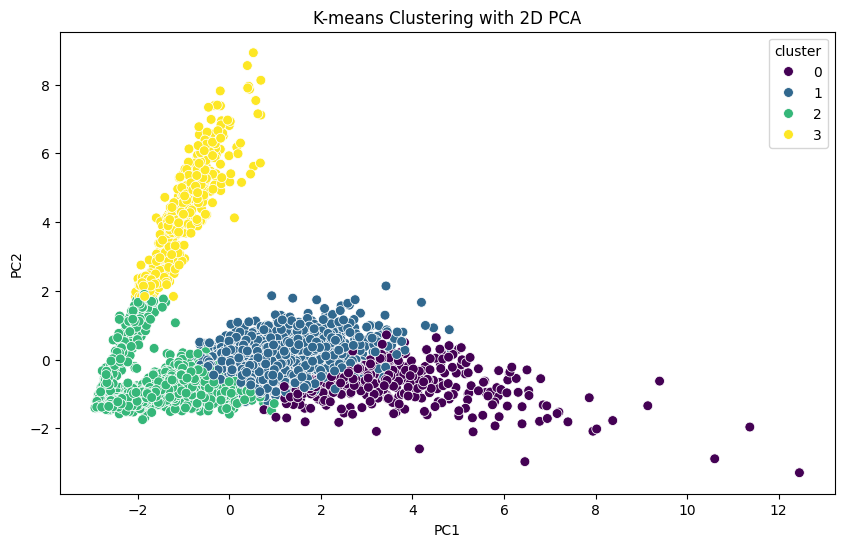

In [44]:
# apply PCA to reduce to 2 dimensions -> because its impossible to visualize 12 features directly, PCA transforms the features into 2 features
pca = PCA(n_components=2)                               #transforms to 2 dimensions
reduced_features = pca.fit_transform(scaled_features)   #applies PCA to the scaled features and creates new 2D Data

# Create a DataFrame with PCA results and cluster labels
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])     #Creating new Dataframe with two new variables (PC1 and PC2) as colums
reduced_df['cluster'] = cluster_labels                                  #Creating new column named cluster with cluster labels for each data point

# Scatterplot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=50)
plt.title('K-means Clustering with 2D PCA')
plt.show()

### Mark the centroid for each cluster

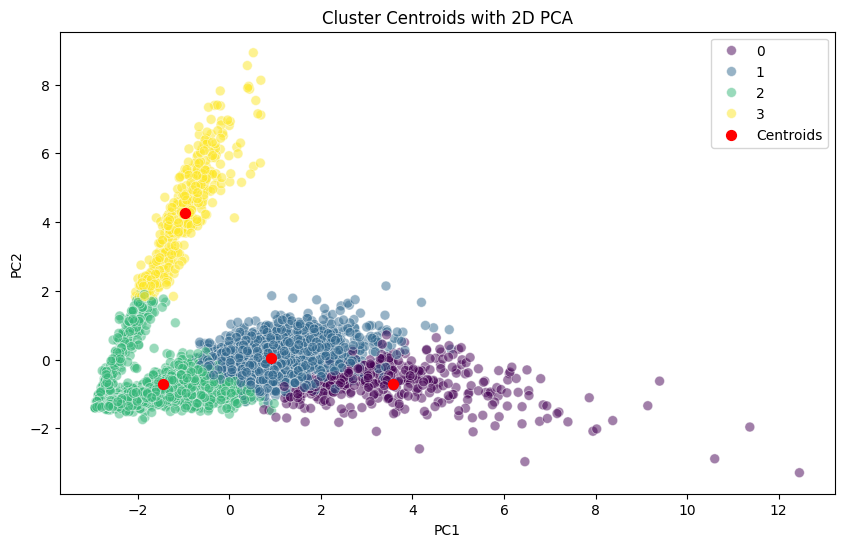

In [45]:
# Calculate centroids in the PCA-reduced space
centroids = pca.transform(kmeans.cluster_centers_)

# Plotting centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='.', s=200, label='Centroids')
plt.title('Cluster Centroids with 2D PCA')
plt.legend()
plt.show()

### Heatmap for every feature in each cluster

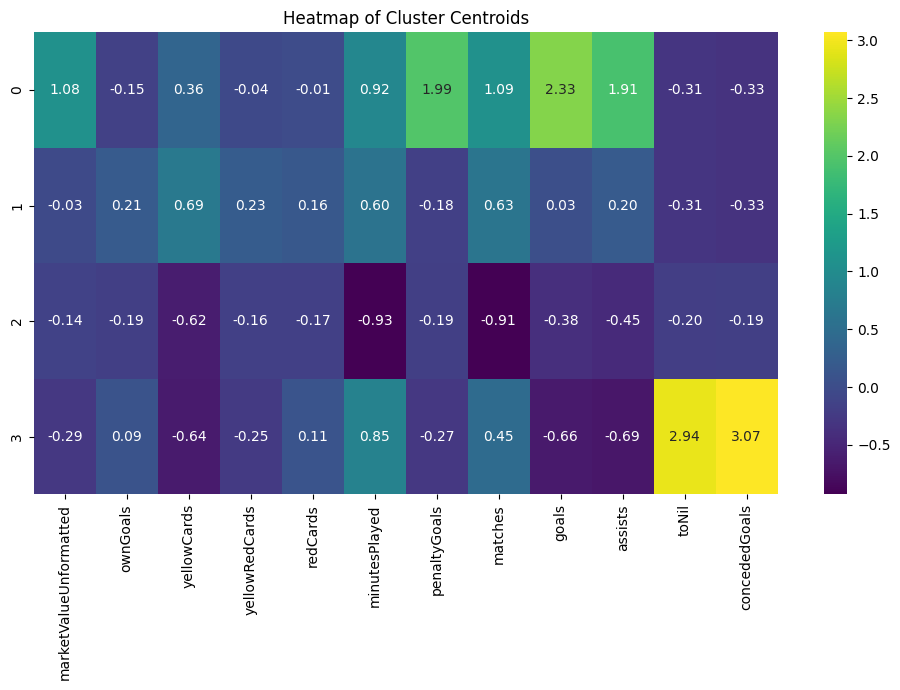

In [46]:
# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Cluster Centroids')
plt.show()

### Interpretation

Firstly we used our dataframe (df_final_merged) to import all the features we want to analyze in this chapter. To find out what value for k is best for our dataframe, we used the elbow method. The elbow method indicated, that the best value for k is 4.

Following the elbow method, we used k = 4 to plot the k-means clustering.

After the k-means plot, we also identified and marked all the centroids for each cluster, so that in the next step, we can define what features are more or less in which cluster.
We can see that in the heatmap. Basically all the rows represent each cluster and each column a single feature. The higher the number in each square means, that the feature is highly represented in that cluster. And a low score means that the feature has almost no datapoints in that cluster.
On the right side we can also see a scale with a color gradient, which changes based on the score of each feature. 

### Silhouette Analysis for k=4

Average silhouette score for all clusters: 0.24025631371524636


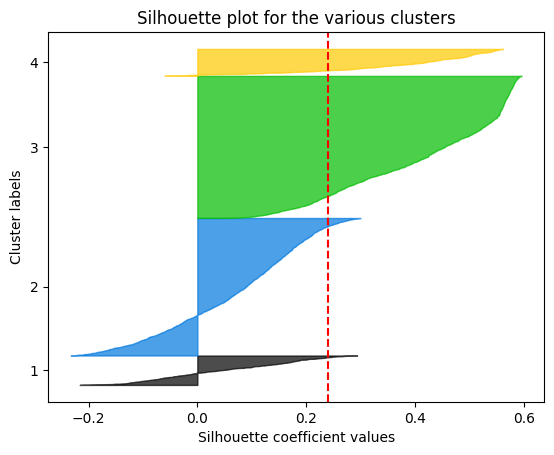

In [47]:
# Calculate the silhouette score for each sample
silhouette_vals = silhouette_samples(scaled_features, cluster_labels)

# Calculate the silhouette score for the entire dataset
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

print(f'Average silhouette score for all clusters: {silhouette_avg}')

# Silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i, cluster in enumerate(set(cluster_labels)):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / chosen_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.title('Silhouette plot for the various clusters')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.yticks(y_ticks, range(1, chosen_k + 1))
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

### Interpretation

Since this silhouette analysis is used to define if the k-value that the elbow method recommended for us, is truly the best, we can see that the overall silhouette score is pretty low. Especially for the clusters 1 and 2 which have negative scores. That means that the datapoints from the just mentioned clusters are overlapping and actually would be nearer to a different centroid, that they have been assigned to. The total silhouette score is for the value of k = 4.

For n_clusters = 3, the average silhouette score is : 0.2558252499599637
For n_clusters = 4, the average silhouette score is : 0.24025631371524636
For n_clusters = 5, the average silhouette score is : 0.25726863651608567
For n_clusters = 6, the average silhouette score is : 0.27570247257805974
For n_clusters = 7, the average silhouette score is : 0.27036320136143144
For n_clusters = 8, the average silhouette score is : 0.28823387528707434


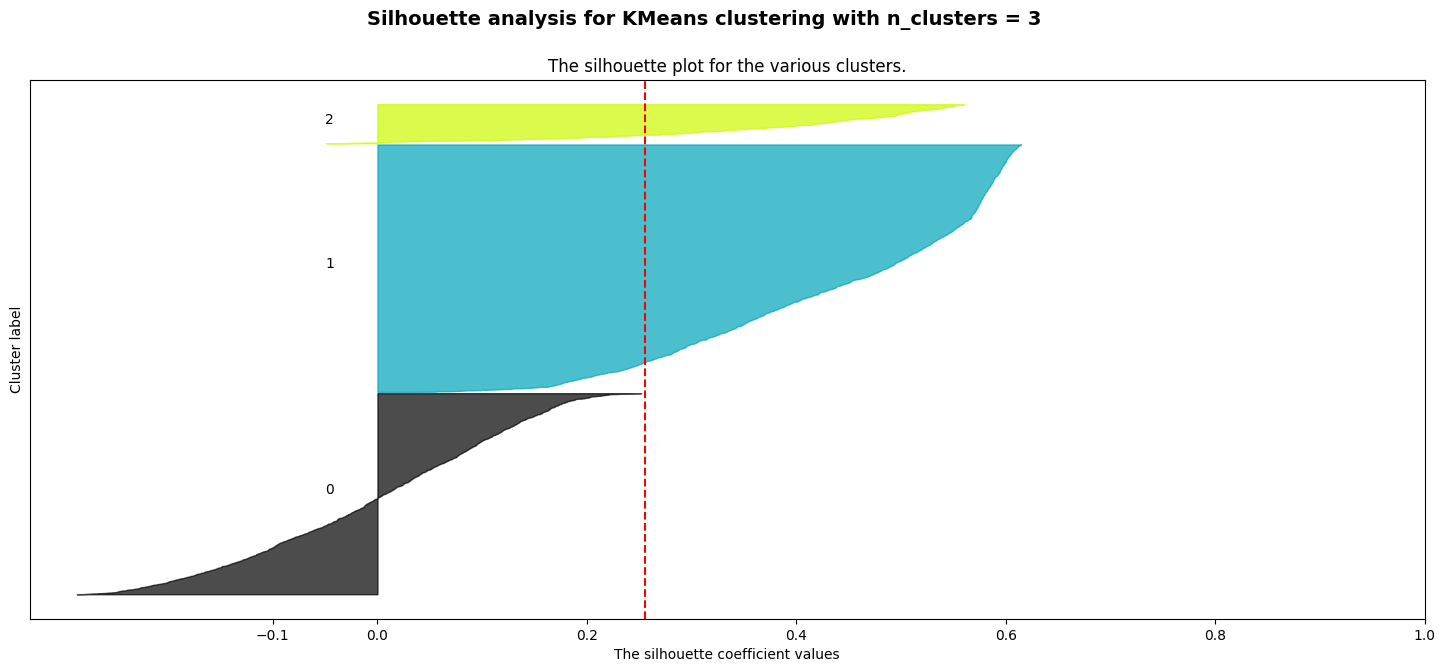

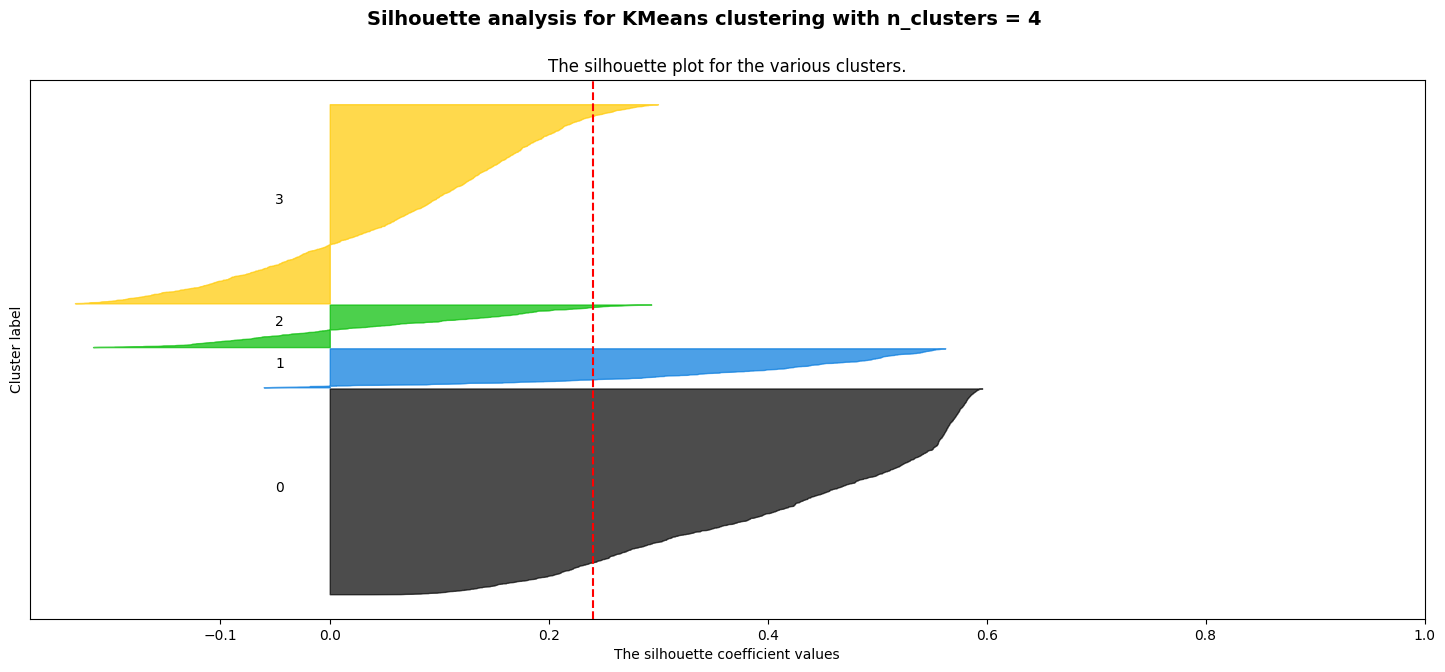

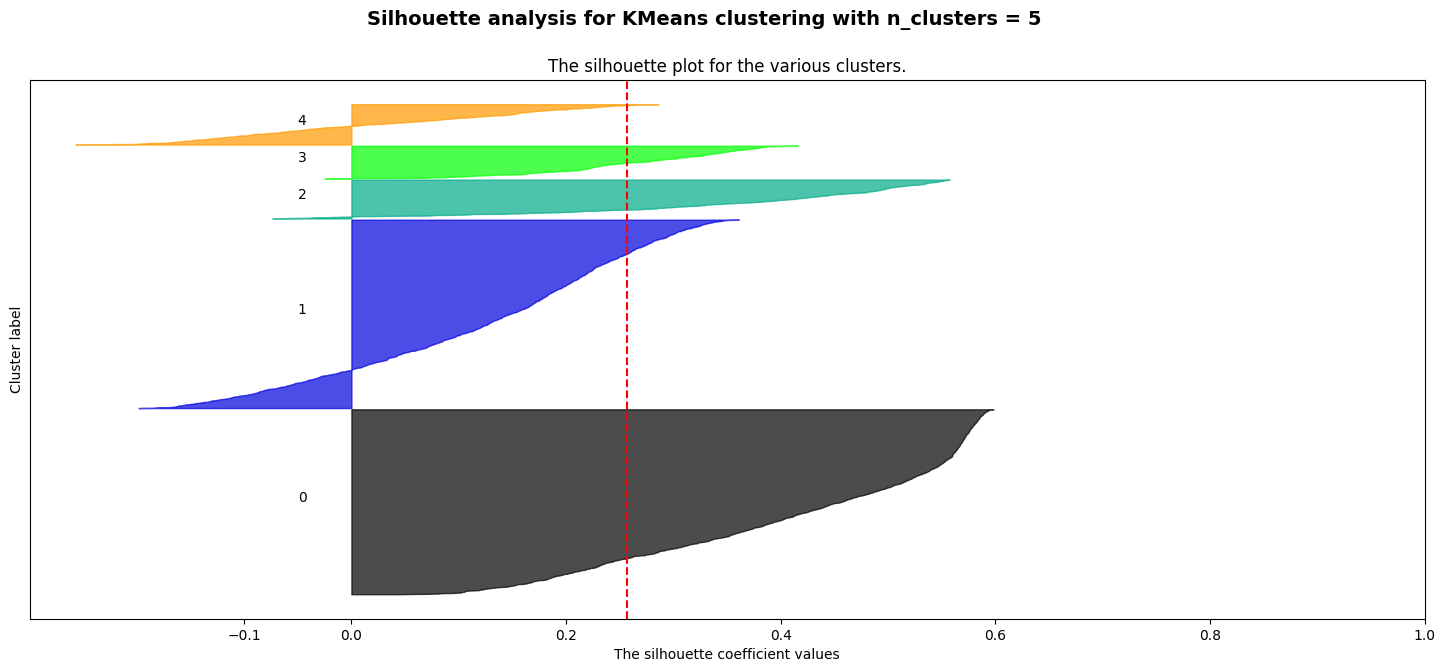

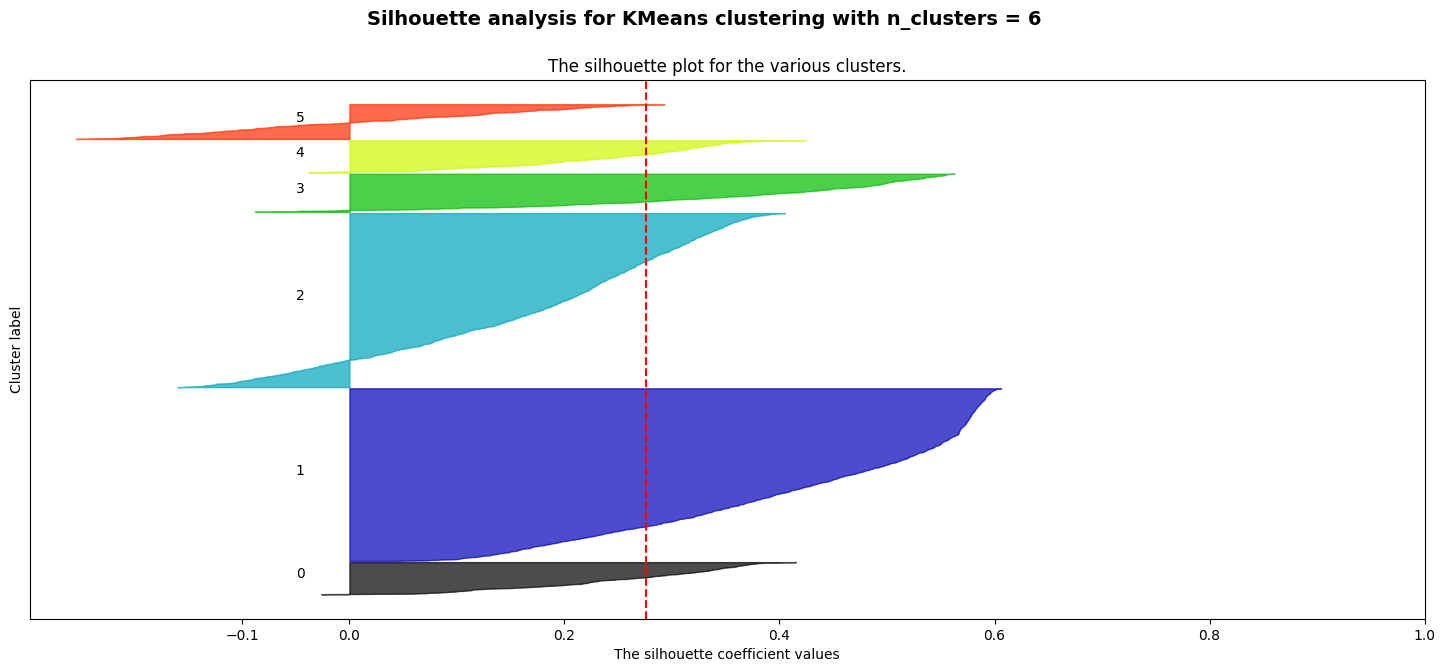

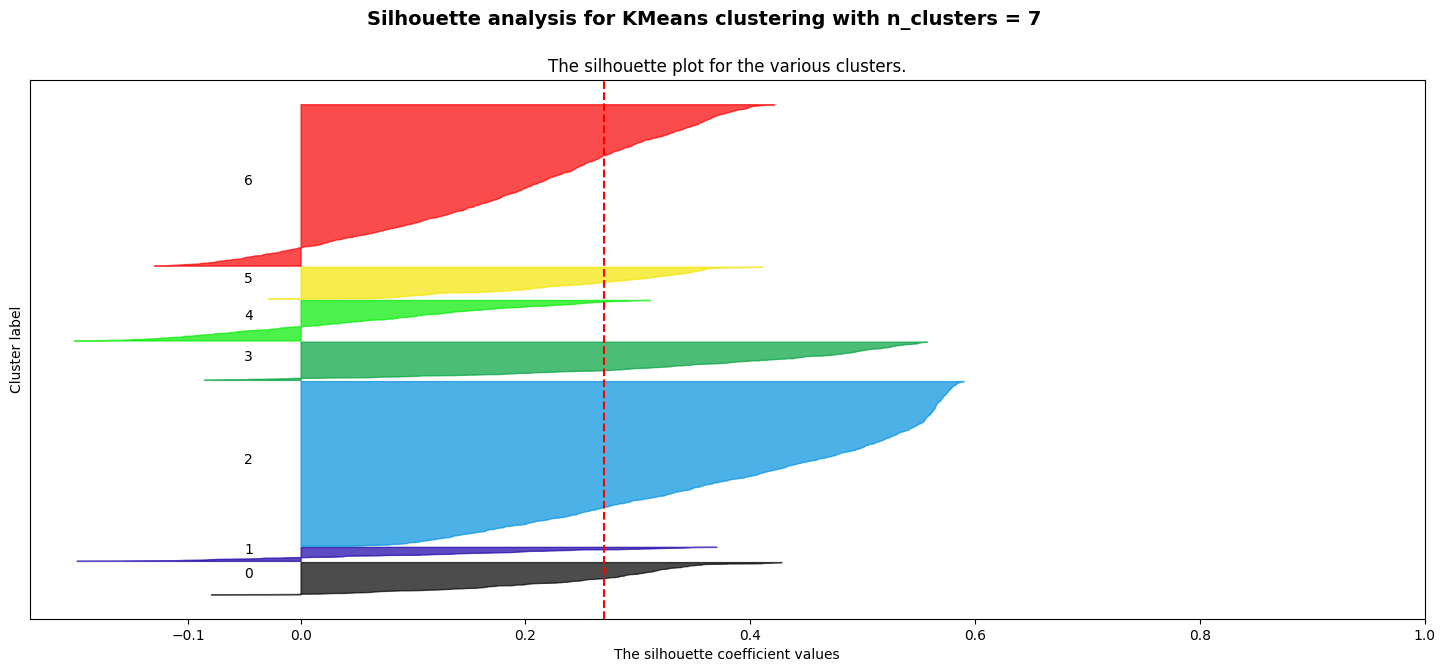

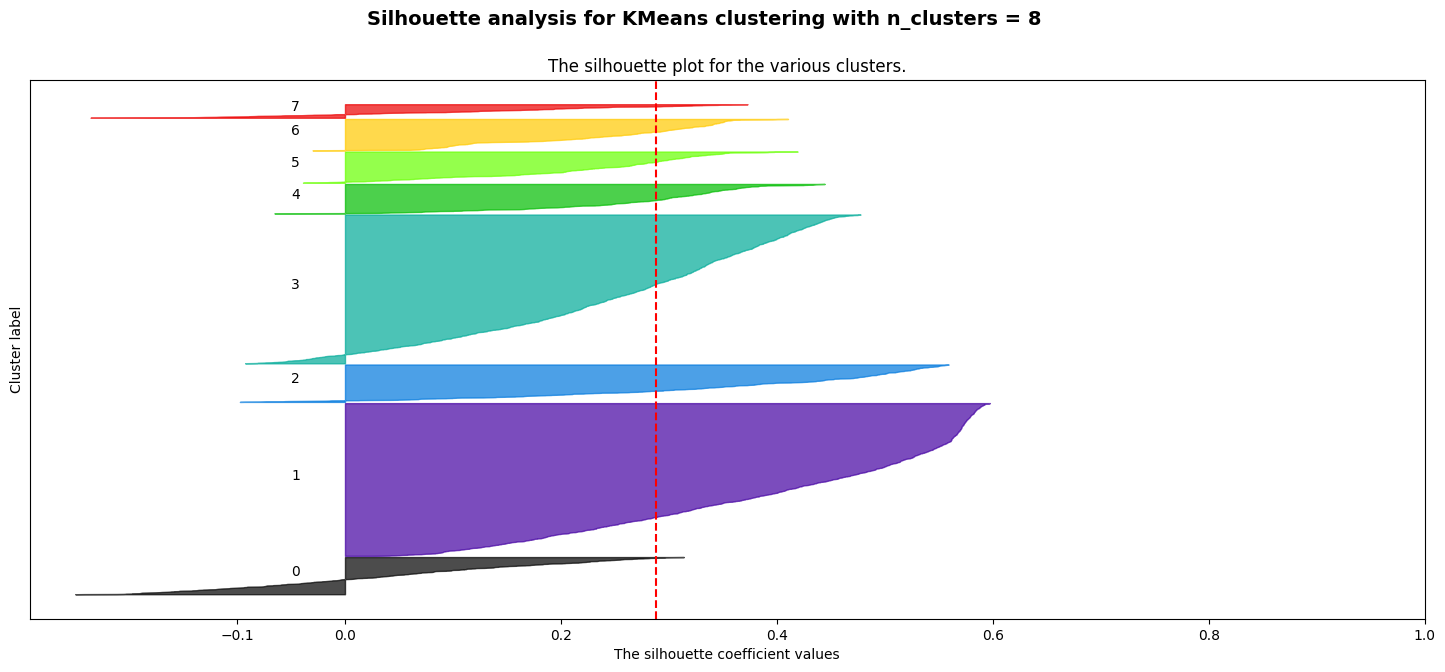

In [48]:
range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the k-means clusterer with n_clusters value and a random generator seed for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=30)
    cluster_labels = clusterer.fit_predict(scaled_features)

    # The silhouette_score gives the average value for all samples
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

    y_lower = 10  # For space between the silhouette plots of individual clusters
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers in the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Display the plot
    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### Interpretation of other values for k

In these plots we can compare the silhouette scores for different values of k. (Silhouette score for k=4 is 0.24025631371524636)

- k=3, the average silhouette score is : 0.2558252499599637
- k=4, the average silhouette score is : 0.24025631371524636
- k=5, the average silhouette score is : 0.25726863651608567
- k=6, the average silhouette score is : 0.27570247257805974
- k=7, the average silhouette score is : 0.27036320136143144
- k=8, the average silhouette score is : 0.28823387528707434

Comparingly, the average silhouette scores for all other values of k are higher than for k=4 but by a fine margin. In conclusion we can say that 4 isn't the best value for k.